In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pylab as plt

In [2]:
df  = pd.read_csv('/content/data/diabetes_data.csv', sep=";")

In [3]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
df.replace('Male',1,inplace = True)
df.replace('Female',0,inplace = True)
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [5]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [8]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X_train)
print(y_train)

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
434   53       1         1           1                   1         1   
436   41       1         1           1                   1         1   
208   54       1         0           0                   1         1   
332   50       0         0           0                   0         1   
220   38       1         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
71    35       0         0           1                   1         1   
106   58       1         0           1                   1         1   
270   40       0         1           1                   1         1   
435   57       1         1           1                   1         1   
102   90       0         0           1                   1         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
434           1               0                1        0   

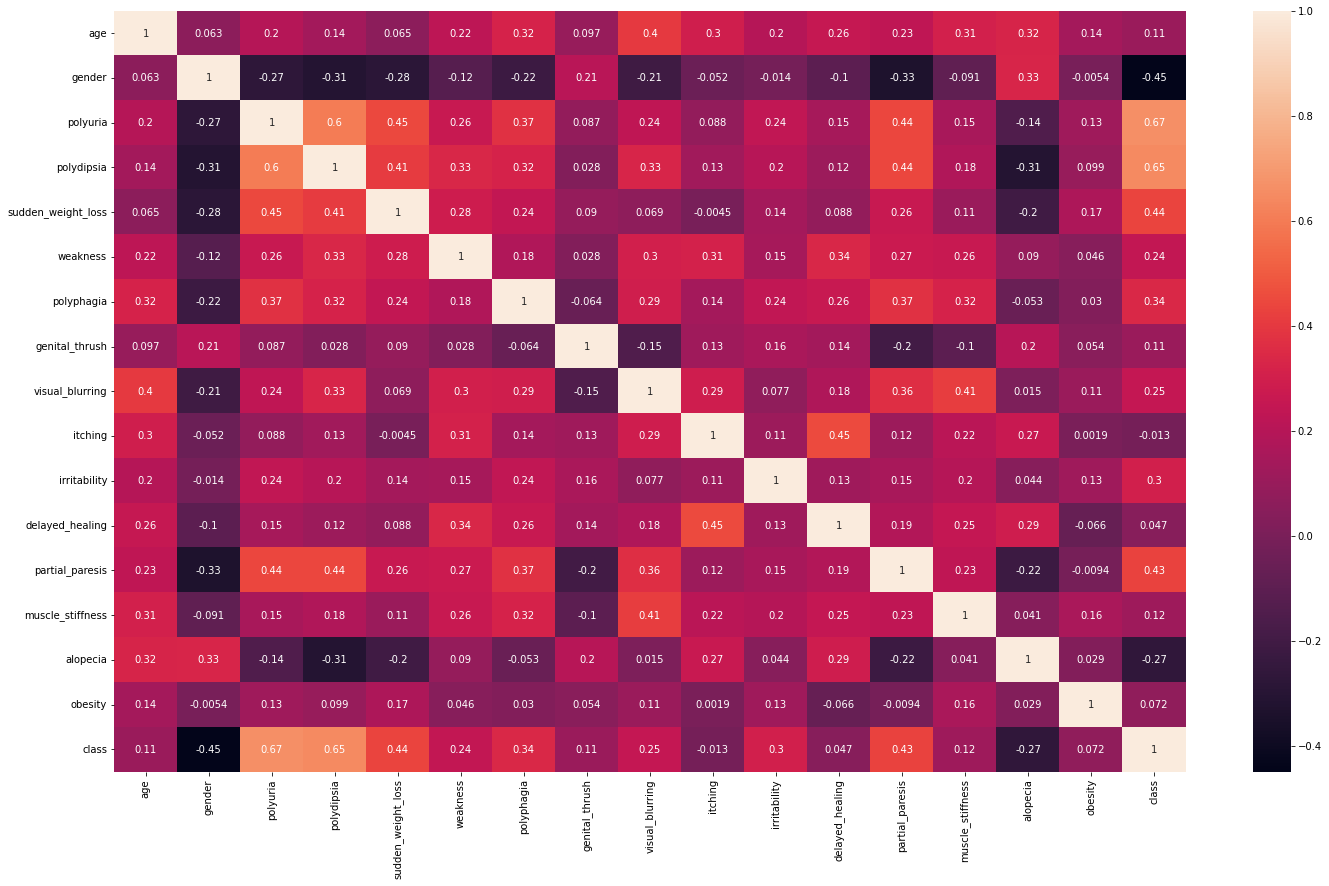

In [15]:
plt.figure(figsize=(24, 14))
sns.heatmap(df.corr(), annot=True);

In [16]:
skew_value = df.skew().sort_values(ascending=False)
skew_value

obesity               1.769420
genital_thrush        1.334223
irritability          1.206305
alopecia              0.657608
muscle_stiffness      0.517893
sudden_weight_loss    0.336359
age                   0.329359
partial_paresis       0.280426
visual_blurring       0.209426
polydipsia            0.209426
polyphagia            0.178134
delayed_healing       0.162537
itching               0.054022
polyuria              0.015430
weakness             -0.352476
class                -0.475715
gender               -0.543509
dtype: float64

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=input_shape, name="input_1"))
model.add(Dense(128, activation='relu', name="input_2"))
model.add(Dense(2, activation='sigmoid', name="output_layer"))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.fit(X, y,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=200,
    verbose=1)

Epoch 1/200
17/17 [==============================] - 1s 22ms/step - loss: 0.7374 - accuracy: 0.6096 - val_loss: 0.6012 - val_accuracy: 0.7692
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7462 - val_loss: 0.4312 - val_accuracy: 0.8846
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7327 - val_loss: 0.4770 - val_accuracy: 0.7308
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8577 - val_loss: 0.3305 - val_accuracy: 0.8750
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3600 - accuracy: 0.8365 - val_loss: 0.3042 - val_accuracy: 0.8654
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.8462 - val_loss: 0.3131 - val_accuracy: 0.8846
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.8596 - val_loss: 0.2948 - val_accuracy: 0.8942
Epoch 8/200


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (Dense)             (None, 128)               2176      
                                                                 
 input_2 (Dense)             (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 18,946
Trainable params: 18,946
Non-trainable params: 0
_________________________________________________________________


In [28]:
y_pred = model.predict(X)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"y_pred: {y_pred[0]}")
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

4/4 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 1.0000
y_pred: [0.11777312 0.91262317]
Model loss on the test set: 0.025181017816066742
Model accuracy on the test set: 100.00%


In [53]:
from tensorflow import keras,lite
keras_file = "model.h5"
tf.keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open("model.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpdwc6b45u/assets


77648